# Control en espacio de estados LQR continuo
Prueba de la libreria con LQR continuo, diseño de controlador y respuesta escalón  
Falta simulación

In [38]:
import numpy as np
import control as ct

In [ ]:
VN = 5  # m/s   -> Velocidad nominal del carrito
L = 0.1 # m     -> Distancia entre ruedas traceras
A = np.array([[0, 0, -VN],
              [0, 0, 0],
              [0, 0, 0]])
B = np.array([[0, 0],
              [1, 0],
              [0, VN/L]])
C = np.eye(3)
D = np.zeros((3,2))
sys = ct.ss(A, B, C, D,
            inputs=['v', 'alpha'],
            outputs=['x', 'y', 'theta'],
            states=['x','y','theta'],
            name='carrito')

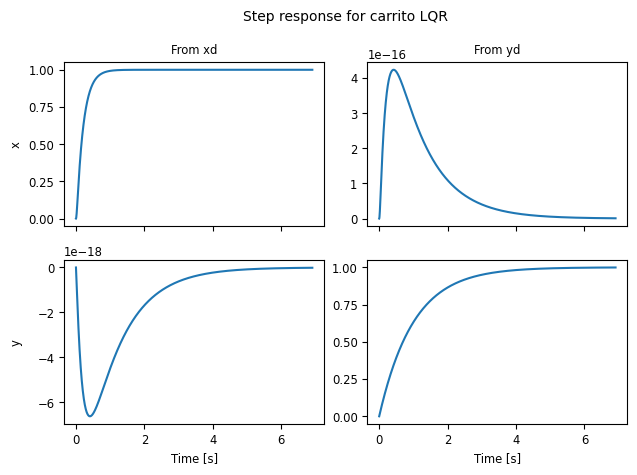

In [40]:
Q = np.diag([1,1,1])
R = np.diag([1,1])
K, S, E = ct.lqr(sys, Q, R)
C = np.array([[1, 0, 0],
              [0, 1, 0]])
D = np.zeros((2,2))
N = -np.linalg.inv(C @ np.linalg.inv(A - B @ K) @ B)
sys_ct = ct.ss(A - B @ K, B @ N, C, D,
            inputs=['xd', 'yd'],
            outputs=['x', 'y'],
            states=['x','y','theta'],
            name='carrito LQR')
cplt = ct.step_response(sys_ct).plot()